### Hiperparámetros

---

Los **hiperparámetros** son las características **externas** de un modelo,  *no se "aprenden"*, son valores que tiene que definirse cuando se implementa el modelo, *antes de entrenarlo*.

Un ejemplo es el valor *k* en el algoritmo `KNeighborsClassifier`.

Los **parámetros** son las características **internas** de un modelo, son valores estimados a partir del entrenamiento con los datos. 

Un ejemplo son los *coeficientes* de una regresión lineal.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_hiperparametros.png" alt="hiperparametros" style="width: 500px;"/>

### Hiperparámetros

---

No podemos saber *a priori* cuáles son los mejores valores de los **hiperparámetros** del modelo para resolver un problema determinado. 

Además, mientras una *configuración específica de hiperparámetros* genera una buena performance del modelo para un determinado dataset, en otro similar quizá ya no lo es.

Por lo tanto, la optimización o ajuste de los hiperparámetros, **hyperparameters tuning**, es decir, la selección de un **conjunto óptimo de valores para los hiperparametros** es una parte esencial del machine learning.

Pero los modelos pueden tener *muchos hiperparámetros*, y encontrar la mejor combinación nos lleva a un *problema de búsqueda de información*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_hiperparametros_ejemplo.png" alt="hiperparametros" style="width: 500px;"/>

### Grid Search - Introducción

---

Vamos a analizar dos métodos de *hyperparameters tuning*: **Grid Search** y **Random Search**.

Ambos hacen algo simple; para cada combinación de valores de los hiperparámetros: 
- los aplica sobre el *dataset de train* --> los *evalua con cross validation* --> *registra el score*.

Al final de todas las búsquedas:

- selecciona la combinación con **más alto score** --> aplica sobre **train** --> predice sobre **test**.



<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_grid_random_2.png" alt="Drawing" width="70%" />

`GridSearch` busca la mejor combinación de *hiperparámetros* dentro de una **grilla (grid)** especificada previamente. La búsqueda es **exhaustiva para cada valor de la grilla**.

`RandomSearch` selecciona en forma **aleatoria** un **subset** de los *hiperparámetros*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_grid_random_1.png" alt="Drawing" style="width: 500px;"/>

Es importante tener en cuenta el **costo a nivel de cómputo** de evaluar todas las combinaciones de los valores de los hiperparámetros. Por lo tanto, en algunos casos vamos a tener que elegir una **grilla reducida**, o usar **RandomSearch** que selecciona un subset de combinaciones. 

### Grid Search - Implementación

---

Para implementar en `sklearn` una búsqueda sobre **hiperparámetros** tenemos que considerar:

- Un **estimador**, es decir, un modelo sobre el cual queremos trabajar.

- Un **espacio de parámetros** donde vamos a hacer la búsqueda.

- Un **método de busqueda** sobre los modelos candidatos (`RandomSearch`,`GridSearch`).

- Un **esquema de validación cruzada**, seleccionando la cantidad de folds.

- La **métrica de evaluación** para elegir el mejor modelo.


Por ejemplo:

- Un **estimador**, el modelo KNN.

- Un **espacio de parámetros**, el parámetro `n_neighbors` con un rango de valores entre 1 y 30.

- Un **método de busqueda**, `RandomSearch`.

- Un **esquema de validación cruzada**, Cross validation con 10 folds.

- La **métrica de evaluación**, maximizar `accuracy`.


<div class="div-dhds-fondo-1"> Dataset 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

###  Dataset

---
Vamos a aplicar **GridSearch** y **RandomSearch** sobre el dataset de abalones.

In [1]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('abalone.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
df.sample(3)

Filas: 3676 Columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
758,M,0.570,0.440,0.155,1.116,0.4775,0.2315,0.2700,13,1
1765,I,0.375,0.245,0.100,0.394,0.1660,0.0910,0.1125,6,0
548,F,0.565,0.450,0.160,0.795,0.3605,0.1555,0.2300,12,1


Armamos la matriz de features ($X$) y el target ($y$)

In [3]:
X = df.drop(['Adulto','Sex'], axis=1)
y = df['Adulto']

Vemos la distribución de los labels de la clase.

In [4]:
print(y.groupby(y).count())

Adulto
0    2073
1    1603
Name: Adulto, dtype: int64


Hacemos el split entre train y test.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=56)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2573, 8) (1103, 8) (2573,) (1103,)


Debemos estandarizar las features, ya que las escalas entre algunas de ellas son distintas.

In [6]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

###  Hiperparámetros de un modelo

---
Podemos conocer todos los hiperparámetros de los modelos con el método `get_params`.

Por ejemplo, veamos los del modelo *KNN, vecinos más cercanos*. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

###  Prueba manual

---
Antes de usar los métodos `RandomSearch` o `GridSearch` para realizar el *tuning de los hiperparámetros*, es conveniente realizar **manualmente una prueba** con distintos valores para los hiperparámetros a evaluar.

Vamos a calcular el valor de **accuracy** para distintos valores K del hiperparámetro `n_neighbors`, para conocer el valor óptimo.

Recordemos que para la evaluación usamos *cross validation*.

Para hacerlo consideramos el método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), que evalúa los resultados de una métrica en un esquema de validación cruzada. 

En el parámetro `scoring='accuracy'` indicamos la métrica.

Y el parámetro `cv=10` para definir 10 folds, lo reemplazamos usando previamente el método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) que asegura que los 10 folds cuentan con casos seleccionados en forma aleatoria *manteniendo la distribución original de las etiquetas*.

In [8]:
# n_splits = permite determinar la cantidad de folds
# random_state = nos permite definir una semilla para asegura reproducibilidad
# shuffle = nos asegura que las particiones se van a hacer en forma aleatoria
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

Hacemos un *for* para recorrer distintos valores de K, evaluamos los scores de la validación cruzada de los datos de train y guardamos el promedio de los scores.

In [9]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=folds, scoring='accuracy')
    k_scores.append(scores.mean())

En la lista `k_scores` encontramos los valores promedio de **accuracy** para los distintos valores de **k**.

In [10]:
for i, value in enumerate(k_scores):
     print('K=', i+1,':','%.4f'%value,'||',end=' ',sep='')

K=1:0.8492|| K=2:0.8496|| K=3:0.8838|| K=4:0.8768|| K=5:0.8900|| K=6:0.8885|| K=7:0.8920|| K=8:0.8912|| K=9:0.8947|| K=10:0.8935|| K=11:0.8920|| K=12:0.8920|| K=13:0.8966|| K=14:0.8908|| K=15:0.8935|| K=16:0.8892|| K=17:0.8947|| K=18:0.8923|| K=19:0.8951|| K=20:0.8939|| K=21:0.8927|| K=22:0.8916|| K=23:0.8927|| K=24:0.8923|| K=25:0.8951|| K=26:0.8927|| K=27:0.8920|| K=28:0.8900|| K=29:0.8912|| K=30:0.8888|| 

Grafiquemos estos resultados.

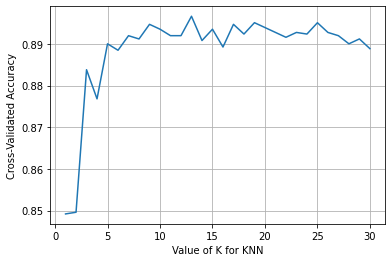

In [11]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

Confirmamos que el **k** óptimo es 13 con un score de validación de 0.8966.

### Grid Search - Implementación

---

Ahora trabajemos con el método `GridSearchCV` que básicamente va a implementar en forma automática la búsqueda y analisis de los hiperparámetros que realizamos en forma manual.


Recordemos que para implementar en `sklearn` una búsqueda sobre **hiperparámetros** tenemos que considerar:

- Un **estimador**, es decir, un modelo sobre el cual queremos trabajar.

- Un **espacio de parámetros** donde vamos a hacer la búsqueda.

- Un **método de busqueda** sobre los modelos candidatos (`RandomSearch`,`GridSearch`).

- Un **esquema de validación cruzada**, seleccionando la cantidad de folds.

- Una **métrica de evaluación** para elegir el mejor modelo.


`GridSearchCV` lo implementa en sus parámetros:
- **estimator =** Modelo instanciado.
- **param_grid=** Grilla de parametros para recorrer. Un diccionario cuyas claves son pares (nombre hiperparámetro, lista de valores).
- **cv=** Cantidad de folds para la validación cruzada.
- **scoring=** Métrica usada para evaluar. 

Y uno opcional, pero importante porque las búsquedas exhaustivas pueden consumir mucha CPU: 
- **n_jobs=** Número de procesadores que corren en paralelo.

### Grid Search - Implementación

---

Avancemos con la implementación.

In [12]:
from sklearn.model_selection import GridSearchCV

**Estimador**: el modelo instanciado.

In [13]:
knn = KNeighborsClassifier()

**Espacio de parámetros:** grilla de parámetros que queremos testear. Diccionario con las claves *nombre=rango de valores*.

In [14]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


**Esquema de validación cruzada:** definimos la cantidad de folds, con el método `StratifiedKFold`

In [15]:
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

**Método de busqueda:** GridSearchCV.

**Métrica de evaluación:** Accuracy.

In [16]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')

Entrenamos utilizando el método `.fit` de grid. Puede tardar; recordemos que hace una búsqueda exhaustiva.

In [17]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Grid Search - Implementación

---
Analicemos los resultados.

`GridSeachCV` devuelve en **cv\_results\_** información sobre la evaluación de los hiperparámetros. 

Observamos el score obtenido en cada split, el **mean_test_score** y el **std_test_score**.

Y además, encontramos **rank_test_score** que nos indica cuál fue el hiperparámetro con mejor score de validación.

In [18]:
pd.DataFrame(grid.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004058,0.000726,0.009484,0.001184,1,{'n_neighbors': 1},0.879845,0.860465,0.813953,0.856031,0.824903,0.821012,0.856031,0.840467,0.867704,0.871595,0.849201,0.021695,30
1,0.003406,0.000494,0.009396,0.001194,2,{'n_neighbors': 2},0.844961,0.852713,0.833333,0.844358,0.832685,0.852140,0.863813,0.828794,0.867704,0.875486,0.849599,0.014996,29
2,0.002505,0.001022,0.008945,0.002977,3,{'n_neighbors': 3},0.922481,0.875969,0.856589,0.887160,0.887160,0.887160,0.875486,0.867704,0.883268,0.894942,0.883792,0.016687,27


- **.best\_estimator\_** señala el mejor modelo. Informa el  **número óptimo de vecinos**; es similar a lo observado en el proceso manual.

In [19]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

- **best\_score\_** nos indica cuál fue la performance promedio del score de validación del grid search

In [20]:
grid.best_score_

0.8966171990468436

- **best\_params\_** muestra los valores seleccionados de los hiperparámetros.

In [21]:
grid.best_params_

{'n_neighbors': 13}

### Grid Search - Testing

---
Ahora debemos hacer lo que siempre hacemos con los modelos. **Ver su performance sobre los datos de test**.

`GridSeachCV` tiene un método `predict` sobre el objeto `grid` que usa el modelo entrenado con los datos de train y con la mejor combinación de hiperparámetros. 

In [22]:
y_pred_grid = grid.predict(X_test)

Veamos la **matriz de confusión**.    

In [23]:
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

[[567  78]
 [ 53 405]]


Podemos importar de **sklearn**, [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) que brinda un reporte completo de las principales **métricas de evaluación**.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       645
           1       0.84      0.88      0.86       458

    accuracy                           0.88      1103
   macro avg       0.88      0.88      0.88      1103
weighted avg       0.88      0.88      0.88      1103



- Informa las métricas por *label de la clase*. Vemos que funciona mejor para la clase negativa (0) que para la positiva (1).

- **accuracy** es 0.88.

- **support** indica el total de casos por etiqueta. Y 1103 es el total de casos. 

- **macro avg** es la media de cada métrica de evaluación para el total de los casos.

- **weighted avg** es lo mismo que el anterior, pero se calcula la media ponderada por **support**, es decir, teniendo en cuenta la cantidad de casos de cada clase. Este promedio toma en cuenta el potencial **desbalanceo de clases**. En este caso son similares porque no lo tenemos.

### Randomized Search

---
Usemos el otro método: [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). 

Recuerden que la diferencia es que no explora **todo el espacio** de hiperparámetros sino  **combinaciones al azar**. 

Aunque no cubre todo el espacio, puede tener sus ventajas cuando trabajamos con datasets muy pesados, o espacios de hiperparámetros muy grandes.

In [25]:
from sklearn.model_selection import RandomizedSearchCV

Los parámetros de `RandomizedSearchCV` son los mismos que los de `GridSearchCV` pero se agrega `n_iter` que indica el número de combinaciones de hiperparámetros que queremos seleccionar al azar de la grilla que definimos. 

Por default está seteado en **10**. 

Armamos nuevamente nuestra **grilla de hiperparámetros**.

In [26]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


Ahora el tuning se realiza con combinaciones aleatorias de `k`.

In [27]:
random = RandomizedSearchCV(knn, param_grid, n_iter=20, cv=folds, scoring='accuracy',random_state=10)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   random_state=10, scoring='accuracy')

### Randomized Search

---
Analizamos los resultados.

Los mismos métodos que tenemos con `GridSearchCV` los tenemos acá. 

In [28]:
pd.DataFrame(random.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003393,0.000488,0.011031,0.001301,21,{'n_neighbors': 21},0.922481,0.868217,0.872093,0.898833,0.891051,0.898833,0.879377,0.887160,0.898833,0.910506,0.892738,0.015974,6
1,0.001200,0.001469,0.010878,0.005426,8,{'n_neighbors': 8},0.937984,0.883721,0.875969,0.879377,0.891051,0.910506,0.883268,0.879377,0.879377,0.891051,0.891168,0.018253,14
2,0.003124,0.006249,0.007817,0.007817,6,{'n_neighbors': 6},0.930233,0.875969,0.856589,0.883268,0.894942,0.898833,0.887160,0.875486,0.883268,0.898833,0.888458,0.018433,17


In [29]:
print (random.best_estimator_)
print(random.best_score_)
print(random.best_params_)

KNeighborsClassifier(n_neighbors=13)
0.8966171990468436
{'n_neighbors': 13}


Vemos que `RandomizedSearchCV` en este caso obtuvo el mismo resultado que `GridSearchCV`, aunque no probó tantas combinaciones.

In [30]:
print (classification_report(y_test, random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       645
           1       0.84      0.88      0.86       458

    accuracy                           0.88      1103
   macro avg       0.88      0.88      0.88      1103
weighted avg       0.88      0.88      0.88      1103



In [31]:
confusion = confusion_matrix(y_test, random.predict(X_test))
print(confusion)

[[567  78]
 [ 53 405]]


Y con los **datos de test** obtuvimos los mismos resultados.

<div class="div-dhds-fondo-1"> Resumen
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Resumen Grid Search

---

- Los **hiperparámetros** son aquellas características externas de un modelo que no se "aprenden" de forma directa a partir del entrenamiento con los datos, sino que tienen que definirse con anterioridad.

- Los **parámetros** de un modelo son características o propiedades internas cuyos valores son estimados a partir del entrenamiento con los datos.

- Los **hiperparámetros** son muy importantes a la hora de entrenar un modelo ya que van a impactar en su desempeño y no se puede saber **a priori** cuáles son los mejores.

- Existen dos grandes métodos o procesos (aunque no son los únicos) que nos permiten buscar cuáles son los mejores **hiperparámetros** (**hyper-parameter tunning**): 

    - [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) se caracteriza por hacer una búsqueda **exhaustiva para cada valor de la grilla de hiperparámetros** y elige la combinación de ellos que maximiza una métrica determinada.

    - [`RandomizedSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) realiza la búsqueda de la mejor combinación de **hiperparámetros** pero a partir de seleccionar en forma **aleatoria** un **subset** de los **hiperparámetros**, lo que achica el espacio de búsqueda y reduce el tiempo de cómputo.

- La receta general para la búsqueda de **hiperparámetros** consta de: 
    - Elegir un **estimador (modelo)**
    - Elegir un **espacio de hiperparámetros**
    - Elegir un **método de búsqueda** (`RandomSearch`,`GridSearch`).
    - Definir un **esquema de validación cruzada**
    - Definir una **métrica de evaluación**

<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ejercicio

----

- Usando el dataset de abalones, generamos dos modelos:
     - Con el método KNN, para 50 vecinos.
     - Con Naive Bayes.

- Calculamos para cada modelo la *Matriz de confusion*.

- Calculamos para cada modelo las métricas: *Accuracy, Sensitivity o Recall, Precision y  Specificity*.

- Comparamos los dos modelos. Cual es el que ajusta mejor?

- Usemos una curva ROC para compararlos. Verifica lo anterior?

In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Leemos el dataset.

In [34]:
df = pd.read_csv('abalone.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
df.sample(3)

Filas: 3676 Columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
1362,F,0.605,0.470,0.160,10.835,0.5405,0.2215,0.2750,12,1
2592,M,0.590,0.465,0.140,1.046,0.4695,0.2630,0.2630,7,0
1521,F,0.680,0.500,0.185,1.741,0.7665,0.3255,0.4685,12,1


Armamos la matriz de features ($X$) y el target ($y$).

In [35]:
X = df.drop(['Adulto','Sex'], axis=1)
y = df['Adulto']

Generamos los datasets de Train y Test.

In [36]:
# Generamos los datasets de train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

Creamos el modelo KNN para 50 vecinos. Predecimos las clases para los datos de Test.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train);
y_pred_knn = knn.predict(X_test)

Creamos el modelo Naive Bayes. Predecimos las clases para los datos de Test.

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_bayes = gnb.predict(X_test)

**Matriz de confusión**

In [39]:
from sklearn.metrics import confusion_matrix
#confusion_knn = 
#print('KNN\n',confusion_knn)

#confusion_bayes = 
#print('Bayes\n',confusion_bayes)

**Accuracy**

In [40]:
from sklearn.metrics import accuracy_score
#accuracy_knn =
#accuracy_bayes =
#print('Accuracy KNN =',accuracy_knn)
#print('Accuracy Bayes =',accuracy_bayes)

**Recall**

In [41]:
from sklearn.metrics import recall_score
#recall_knn = 
#recall_bayes = 
#print('Recall KNN =', recall_knn)
#print('Recall Bayes =', recall_bayes)

**Precision**

In [42]:
from sklearn.metrics import precision_score
#precision_knn =
#precision_bayes = 
#print('Precision KNN =', precision_knn)
#print('Precision Bayes =', precision_bayes)

**Specificity**

In [43]:
# definimos la función que va a tomar como argumentos los valores reales y los predichos
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn+fp)
    return(sp)

#specificity_knn = 
#specificity_bayes = 

#print('Specificity KNN =', specificity_knn)
#print('Specificity Bayes =', specificity_bayes)

Está claro que el modelo xxxx predice mejor que el modelo yyyy *para este dataset*. Todas las métricas lo indican.

Veamos ahora ambas curvas ROC:

Recordemos que previamente debemos obtener la probabilidad de pertenecer a la clase positiva.

In [44]:
#y_pred_knn_proba = 
#y_pred_bayes_proba = 

In [45]:
from sklearn.metrics import roc_curve
#fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_pred_knn_proba[:,1])
#fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])

Convertimos los valores en un objeto dataframe y graficamos la curva ROC. 

Observamos nuevamente que el modelo xxxx estima mejor; está más cerca de la curva perfecta.

In [46]:
#df_knn = pd.DataFrame(dict(fpr= , tpr=, thr = ))
#plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

#df_bayes = pd.DataFrame(dict(fpr= , tpr= , thr = ))
#plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')

#plt.axis([0, 1.01, 0, 1.01]); plt.legend()
#plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
#plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
#plt.show()

### Solución

---

### Ejercicio

----

- Usando el dataset de abalones, generamos dos modelos:
     - Con el método KNN, para 50 vecinos.
     - Con Naive Bayes.

- Calculamos para cada modelo la *Matriz de confusion*.

- Calculamos para cada modelo las métricas: *Accuracy, Sensitivity o Recall, Precision y  Specificity*.

- Comparamos los dos modelos. Cual es el que ajusta mejor?

- Usemos una curva ROC para compararlos. Verifica lo anterior?

In [47]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Leemos el dataset.

In [50]:
df = pd.read_csv('abalone.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
df.sample(3)

Filas: 3676 Columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
3369,I,0.425,0.325,0.110,0.405,0.1695,0.0920,0.1065,8,0
2043,I,0.395,0.295,0.100,0.293,0.1400,0.0620,0.0820,7,0
1735,M,0.670,0.520,0.165,1.390,0.7110,0.2865,0.3000,11,0


Armamos la matriz de features ($X$) y el target ($y$).

In [51]:
X = df.drop(['Adulto','Sex'], axis=1)
y = df['Adulto']

Generamos los datasets de Train y Test.

In [52]:
# Generamos los datasets de train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

Creamos el modelo KNN para 50 vecinos. Predecimos las clases para los datos de Test.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train);
y_pred_knn = knn.predict(X_test)

Creamos el modelo Naive Bayes. Predecimos las clases para los datos de Test.

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_bayes = gnb.predict(X_test)

**Matriz de confusión**

In [55]:
from sklearn.metrics import confusion_matrix
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print('KNN\n',confusion_knn)

confusion_bayes = confusion_matrix(y_test, y_pred_bayes)
print('Bayes\n',confusion_bayes)

KNN
 [[486  40]
 [ 30 363]]
Bayes
 [[432  94]
 [ 90 303]]


**Accuracy**

In [56]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print('Accuracy KNN =',accuracy_knn)
print('Accuracy Bayes =',accuracy_bayes)

Accuracy KNN = 0.9238302502720348
Accuracy Bayes = 0.7997823721436343


**Recall**

In [57]:
from sklearn.metrics import recall_score
recall_knn = recall_score(y_test, y_pred_knn)
recall_bayes = recall_score(y_test, y_pred_bayes)
print('Recall KNN =', recall_knn)
print('Recall Bayes =', recall_bayes)

Recall KNN = 0.9236641221374046
Recall Bayes = 0.7709923664122137


**Precision**

In [58]:
from sklearn.metrics import precision_score
precision_knn = precision_score(y_test, y_pred_knn)
precision_bayes = precision_score(y_test, y_pred_bayes)
print('Precision KNN =', precision_knn)
print('Precision Bayes =', precision_bayes)

Precision KNN = 0.9007444168734491
Precision Bayes = 0.7632241813602015


**Specificity**

In [59]:
# definimos la función que va a tomar como argumentos los valores reales y los predichos
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn+fp)
    return(sp)

specificity_knn = specificity(y_test, y_pred_knn)
specificity_bayes = specificity(y_test, y_pred_bayes)

print('Specificity KNN =', specificity_knn)
print('Specificity Bayes =', specificity_bayes)

Specificity KNN = 0.9239543726235742
Specificity Bayes = 0.8212927756653993


Está claro que el modelo KNN predice mejor que Naive Bayes *para este dataset*. Todas las métricas lo indican.

Veamos ahora ambas curvas ROC:

Recordemos que previamente debemos obtener la probabilidad de pertenecer a la clase positiva.

In [60]:
y_pred_knn_proba = knn.predict_proba(X_test)
y_pred_bayes_proba = gnb.predict_proba(X_test)

In [61]:
from sklearn.metrics import roc_curve
fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_pred_knn_proba[:,1])
fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])

Convertimos los valores en un objeto dataframe y graficamos la curva ROC. 

Observamos nuevamente que el modelo KNN estima mejor; está más cerca de la curva perfecta.

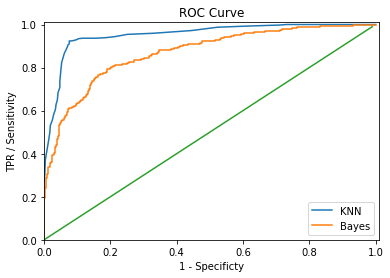

In [62]:
df_knn = pd.DataFrame(dict(fpr=fpr_log_knn, tpr=tpr_log_knn, thr = thr_log_knn))
plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

df_bayes = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')

plt.axis([0, 1.01, 0, 1.01]); plt.legend()
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics" target="_blank">Scikit-learn: metrics</a>

<a href="https://towardsdatascience.com/classification-metrics-thresholds-explained-caff18ad2747" target="_blank">Classification metrics thresholds explained</a>

<a href="https://albertum.medium.com/short-introduction-to-roc-curve-ed137062672f" target="_blank">Short introduction to ROC curve</a>

<a href="https://medium.com/analytics-vidhya/understanding-roc-and-auc-metrics-in-classification-tasks-e5e7594cd6b" target="_blank">Understanding ROC and AUC metrics in classification tasks</a>

<a href="https://en.wikipedia.org/wiki/Hyperparameter_optimization" target="_blank">Hyperparameter optimization</a>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank">Scikit-learn: Grid Search</a>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html" target="_blank">Scikit-learn: Random Search</a>

<a href="https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search" target="_blank">Intro to Model Tuning: Grid and Random Search</a>